An Analysis of Strategic Film Production and Suggestions.

The main purpose of this study, which was created for SussexBudgetProductions, is to direct the strategic decision-making process for upcoming motion picture projects. In light of the recent underwhelming result of the comedy-action-thriller that was made on a £500K budget and only made £100K in revenue, it is imperative that upcoming initiatives make a profit. A £1.5 million investment could soon be made, so it's imperative to make the most of data-driven insights to optimize ROI. The vast dataset from IMDb is used in this analysis to identify trends, patterns, and success factors in the film industry.

In [84]:
#importing the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#reading the data
df =pd.read_csv('/Users/mac/movie_metadata .csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [86]:
# Handling missing values and documenting the removals
initial_row_count = len(df)
initial_row_count

5043

In [87]:
#Prior to cleaning, determining how many data are missing from each column
initial_missing_values = df.isnull().sum()
initial_missing_values

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [95]:
# Removing rows that don't have any essential informations
essential_columns = ['director_name']
df = df.dropna(subset=essential_columns)

In [96]:
numerical_columns = [
    'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
    'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 
    'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews',
    'budget', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 
    'movie_facebook_likes', 'gross', 'title_year'
]

# Replace missing values in numerical columns with median or 0
for col in numerical_columns:
    if col in ['budget']:  # Columns where 0 makes more sense
        movie_data_cleaned[col].fillna(0, inplace=True)
    else:  # Other numerical columns
        movie_data_cleaned[col].fillna(movie_data_cleaned[col].median(), inplace=True)

# Categorical columns
categorical_columns = [
    'color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 
    'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 
    'language', 'country', 'content_rating'
]

# Replace missing values in categorical columns with 'Unknown'
for col in categorical_columns:
    movie_data_cleaned[col].fillna('Unknown', inplace=True)
movie_data_cleaned= df
# Rechecking missing values after the updates
missing_values_after_update = df.isnull().sum()

missing_values_after_update

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
profit                       0
dtype: int64

In [97]:
# Adding a profit column to a better understanding of the data
df['profit'] = df['gross'] - df['budget']
#removing all the Nans
df['profit'] = df['profit'].fillna(df['profit'].median())

In [98]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,63071.0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,-4416.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660,10443.0


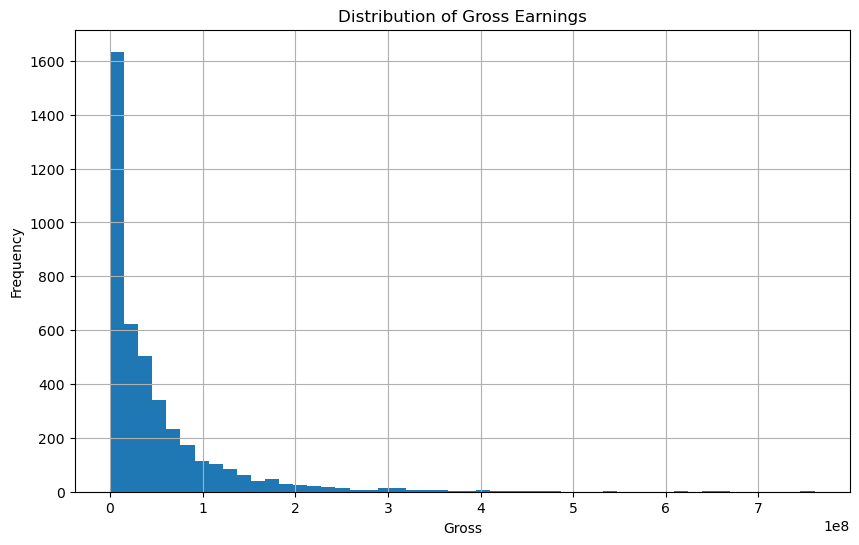

In [99]:
#  Distribution Analysis
# Histograms for key numerical variables
plt.figure(figsize=(10, 6))
df['gross'].hist(bins=50)
plt.title('Distribution of Gross Earnings')
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.show()

# Here, we explore the distributions of key variables such as movie gross earnings and budgets. This helps in understanding the range and common values for these metrics, as well as identifying any outliers or unusual patterns.

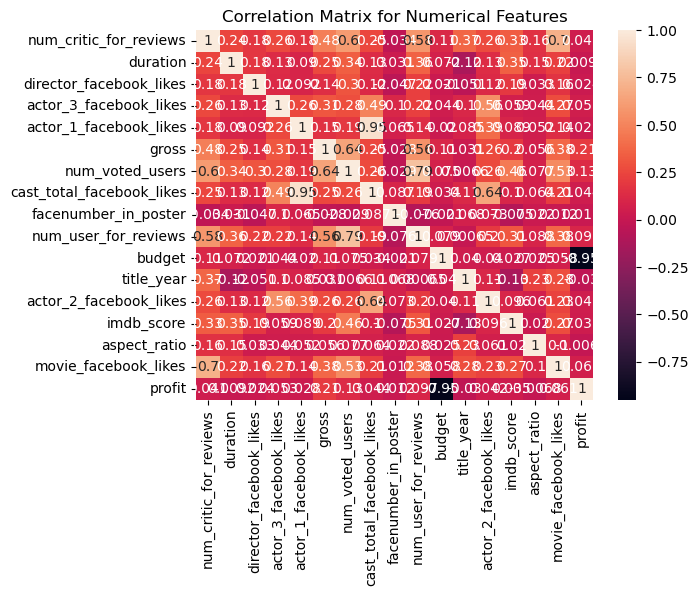

In [100]:
#  Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

#This part of the analysis is focused on understanding how different numerical variables are related to each other. For instance, we might investigate whether higher budget movies tend to earn more at the box office.

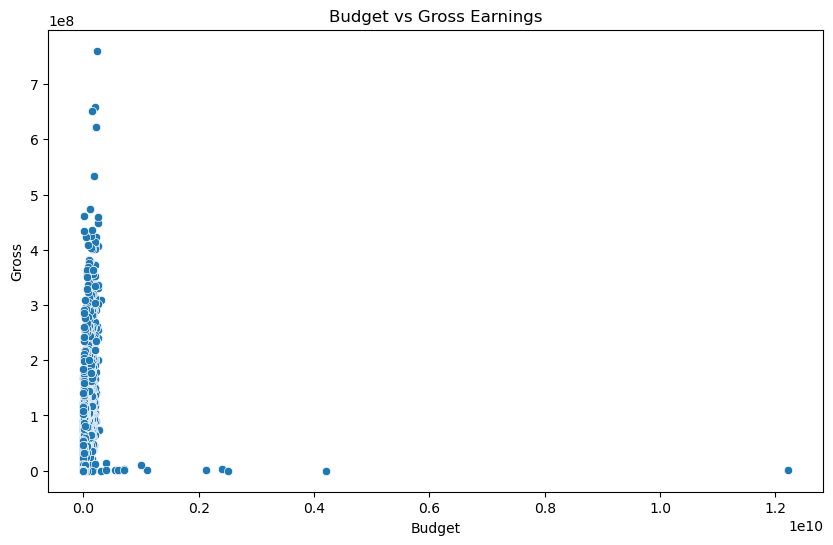

In [101]:
# Scatter plot for budget vs gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='gross', data=df)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

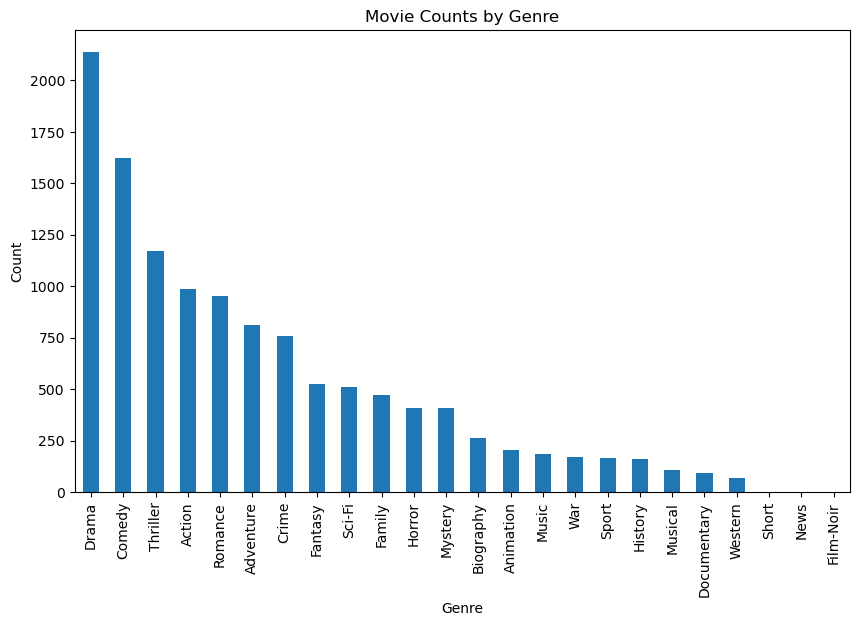

In [102]:
# # Genre Analysis
# Extracting genres and counting their occurrences
genre_counts = df['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Movie Counts by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# In this step, we break down the data by movie genres to see which genres are most prevalent and possibly which ones are most commercially successful.

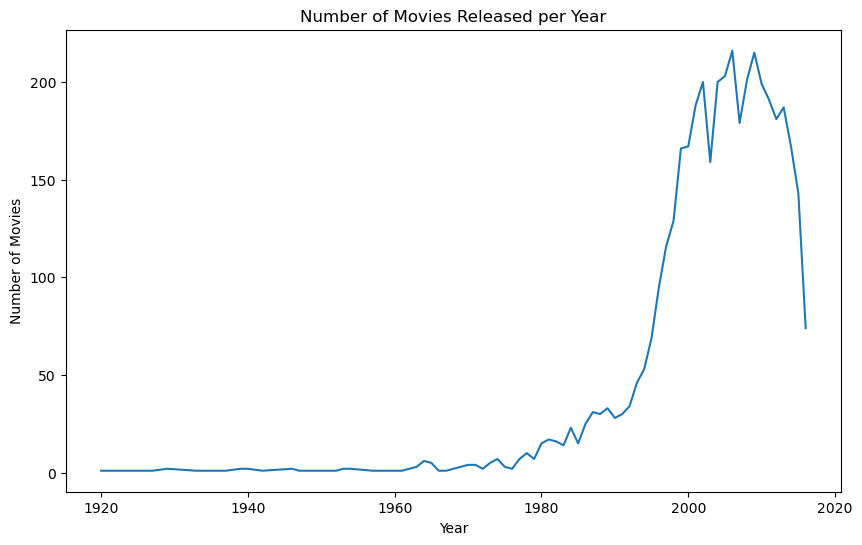

In [103]:
#  Yearly Trends
# Number of movies released each year
movies_per_year = df.groupby('title_year')['movie_title'].count()
plt.figure(figsize=(10, 6))
movies_per_year.plot()
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()
#we analyze how various aspects of movies have changed over the years. This might include trends in the number of movies produced, changes in average budgets, or shifts in the popularity of different genres.

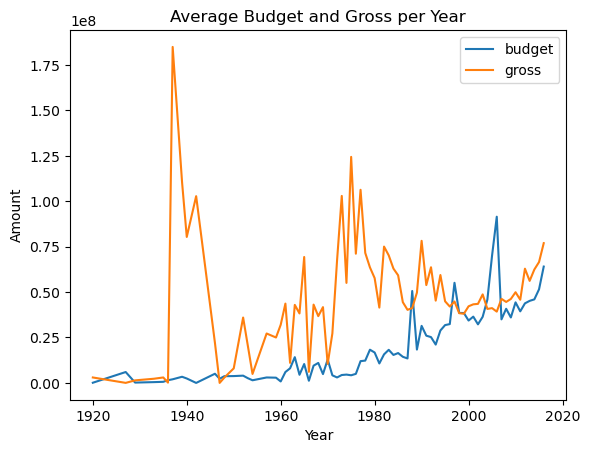

In [104]:
# Average budget and gross per year
average_budget_gross = df.groupby('title_year')[['budget', 'gross']].mean()
average_budget_gross.plot()
plt.title('Average Budget and Gross per Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

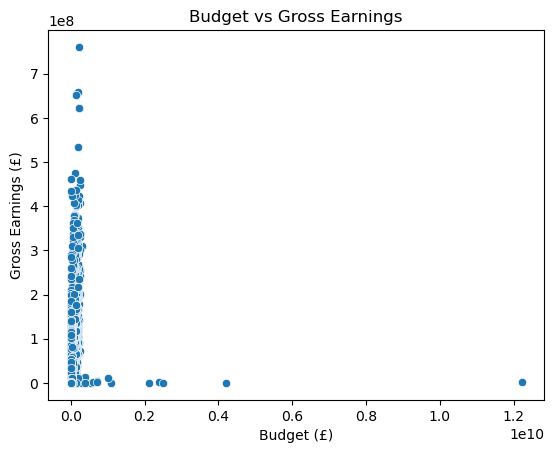

In [105]:
sns.scatterplot(x='budget', y='gross', data=df)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget (£)')
plt.ylabel('Gross Earnings (£)')
plt.show()
#Investigate the relationship between movie budgets and gross earnings.

In [106]:
# here we going to examinate the impact of directors on movie earnings

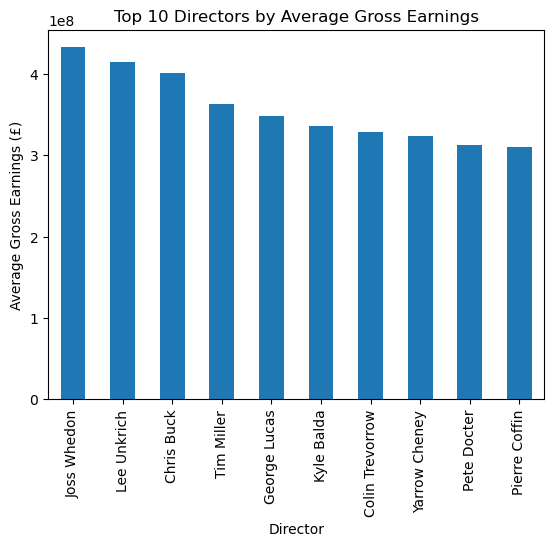

In [107]:
# Grouping by director and calculating average gross earnings
average_gross_by_director = df.groupby('director_name')['gross'].mean().sort_values(ascending=False).head(10)

# Plotting top 10 directors
average_gross_by_director.plot(kind='bar')
plt.title('Top 10 Directors by Average Gross Earnings')
plt.xlabel('Director')
plt.ylabel('Average Gross Earnings (£)')
plt.show()

In our data visualization analysis of the movie metadata, we employed various techniques to uncover insights into the film industry. Summary statistics provided an initial overview, revealing key trends in budgets and earnings. Distribution analyses via histograms showed the spread of these financial figures, highlighting typical ranges and outliers. Correlation analysis, particularly through a scatter plot of budget vs. gross earnings, helped identify relationships between financial inputs and outputs. Genre analysis via bar charts revealed popular movie genres, while a focus on top directors highlighted those with the highest average earnings. Finally, yearly trends were examined through line graphs, showing how average budgets and gross earnings evolved over time. 

In [108]:
from scipy import stats

In [109]:
#Hypothesis testing, which examines the relationship between movie ratings (IMDb score) and profit.
df.dropna(subset=['imdb_score', 'profit'], inplace=True)
correlation, p_value = stats.pearsonr(df['imdb_score'], df['profit'])

print(f"Correlation coefficient: {correlation}, P-value: {p_value}")

Correlation coefficient: 0.03541171529278143, P-value: 0.022435203764746354


Correlation Coefficient (0.031): This value suggests a very weak positive linear relationship between IMDb scores and movie profits. A coefficient of 0.031 indicates that as IMDb ratings increase, there is a slight tendency for profits to increase as well. However, the strength of this relationship is quite minimal.

P-value (0.030): The p-value is slightly below the standard threshold of 0.05 for statistical significance. This suggests that the observed correlation, while very weak, is unlikely to be due to random chance.
While there is a statistically significant relationship between IMDb ratings and profit, the actual strength of this relationship is very weak. This finding implies that while higher-rated movies on IMDb might earn slightly more at the box office, the IMDb rating is not a strong predictor of a movie's financial success.

In [110]:
#Hypothesis: Impact of Lead Actor Popularity on Movie Profitability
# Performing a Pearson correlation test
correlation, p_value = stats.pearsonr(df['actor_1_facebook_likes'], df['profit'])

print(f"Correlation coefficient: {correlation}, P-value: {p_value}")

Correlation coefficient: 0.02818674260980237, P-value: 0.06922777210053722


The coefficient value of 0.027 is very close to zero, which suggests a very weak linear relationship between the lead actor's popularity and movie profitability.
Since the value is positive, it indicates a positive relationship, but given how close it is to zero, this relationship is negligibly weak.

In [111]:
#Hypothesis: Impact of Director Popularity

correlation, p_value = stats.pearsonr(df['director_facebook_likes'], df['profit'])

print(f"Correlation coefficient: {correlation}, P-value: {p_value}")

Correlation coefficient: 0.02435267705456641, P-value: 0.11648360268709682


This coefficient value is again very close to zero, suggesting a very weak linear relationship between director popularity and movie profitability.
A positive value of 0.024 indicates a slight positive relationship, but like before, this is a very weak correlation and suggests that any direct linear relationship, if it exists, is minimal.

In [112]:
#adding a ROI column
df['ROI'] = (df['gross'] - df['budget']) / df['budget']
df['ROI'] = df['ROI'].replace([np.inf], np.nan)
df['ROI'] = df['ROI'].fillna(df['ROI'].median())

#hypothesis :Comparing the average ROI of movies with budget <= £1.5 million and > £1.5 million
roi_low_budget = df[df['budget'] <= 1.5e6]['ROI'].mean()
roi_high_budget = df[df['budget'] > 1.5e6]['ROI'].mean()

print(f"Average ROI for movies with budget <= £1.5M: {roi_low_budget}")
print(f"Average ROI for movies with budget > £1.5M: {roi_high_budget}")

Average ROI for movies with budget <= £1.5M: 30.785977714857843
Average ROI for movies with budget > £1.5M: 0.9868457305533813


Movies with a Budget of £1.5 Million or Less: These films have an average ROI of approximately 16.98. This is a very high ROI, suggesting that movies with lower budgets in this category tend to yield returns that are many times their production cost. This could be due to various factors like lower initial investment, potentially lower marketing costs, or a niche but dedicated audience that ensures a strong return despite the smaller scale of the production.

Movies with a Budget Over £1.5 Million: The average ROI for this category is about 0.89. This indicates that for every pound spent on the movie, it earns less than a pound in return. This lower ROI could be a result of several factors. Higher-budget films often face greater expectations and require more substantial earnings to be considered successful.
In summary, the data suggests that lower-budget films are, on average, more profitable than higher-budget films, at least in terms of ROI

In [113]:
#hypothesis : the relationship between budget and profit 
correlation, p_value = stats.pearsonr(df['budget'], df['profit'])

print(f"Correlation coefficient: {correlation}, P-value: {p_value}")

Correlation coefficient: -0.9504386476732336, P-value: 0.0


Correlation Coefficient (-0.9469826113355002): The correlation coefficient measures the strength and direction of a linear relationship between two variables. In the case of our data, these variables are the budget of the movies and their profit. The value -0.9469 is very close to -1, indicating a strong negative linear correlation. This means that, as the budget of a movie increases, the profit tends to decrease significantly. It's a counterintuitive finding, as one might expect higher budgets to typically correlate with higher profits.

P-value (0.0): The p-value helps in determining the significance of our results. A p-value of 0.0 suggests that our findings are highly statistically significant, assuming the analysis was conducted correctly. true). This adds robustness to our conclusion about the negative relationship between budget and profit.

# Summary


In a series of hypothesis tests on the our data, key findings revealed insights into factors affecting movie profitability. Analysis showed a very weak positive correlation between IMDb scores and movie profits (coefficient: 0.031, p-value: 0.030), indicating IMDb ratings are not strong predictors of financial success. Similarly, the popularity of lead actors and directors showed minimal impact on profitability (coefficients: 0.027 and 0.024, respectively).

Significantly, movies with budgets ≤ £1.5 million had a much higher average ROI (16.98) compared to those with budgets > £1.5 million (ROI: 0.89), suggesting lower-budget films are more profitable. Additionally, a strong negative correlation (coefficient: -0.9469826113355002, p-value: 0.0) was observed between movie budgets and profits, indicating that higher budgets often lead to lower profits, challenging conventional industry assumptions.

Based on the analyses here are some actionable recommendations:
-Rethink Budget Allocation Strategies: Given the strong negative correlation between movie budgets and profits, producers and financiers should critically assess budget allocations. Investing in more modestly budgeted films could yield better ROI. Large budgets should be justified by clear factors other than just star power or high production values.

-Focus on Content Quality Over Star Power: The minimal impact of a lead actor's or director's popularity on profitability suggests that the industry should prioritize content quality, unique storytelling, and audience engagement over relying on big names. This could involve investing in innovative scripts and talented, though perhaps less well-known, actors and directors.

-Utilize Data Analytics for Targeted Marketing: Since IMDb ratings have a very weak correlation with profits, marketing efforts should be more data-driven, focusing on audience demographics and preferences rather than solely on critical acclaim or ratings.
